# Guided and Leaky modes of multi-layered slab waveguide

More complex 4 layer structure.

In [18]:
import numpy as np
import matplotlib as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.optimize import newton
import matplotlib.pyplot as plt

In [175]:
A = SlabExact(scale=1e-6, ts=[4e-6, 2e-6, 2e-6, 4e-6],
              ns=[1.47, 1.5, 1.52, 1.47], xrefs=[400, 200, 200, 400],
              symmetric=True)

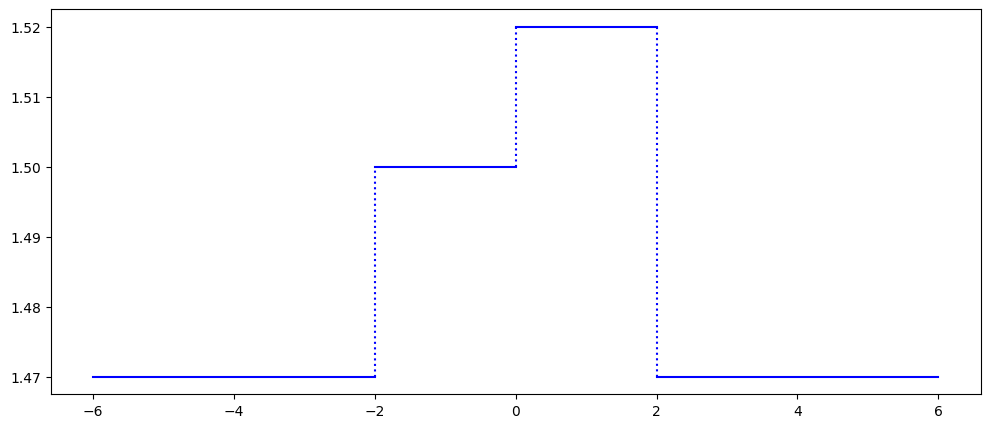

In [176]:
A.plot_refractive_index()

# Guided Modes

In [177]:
field_type = 'TE'
mode_type = 'guided'

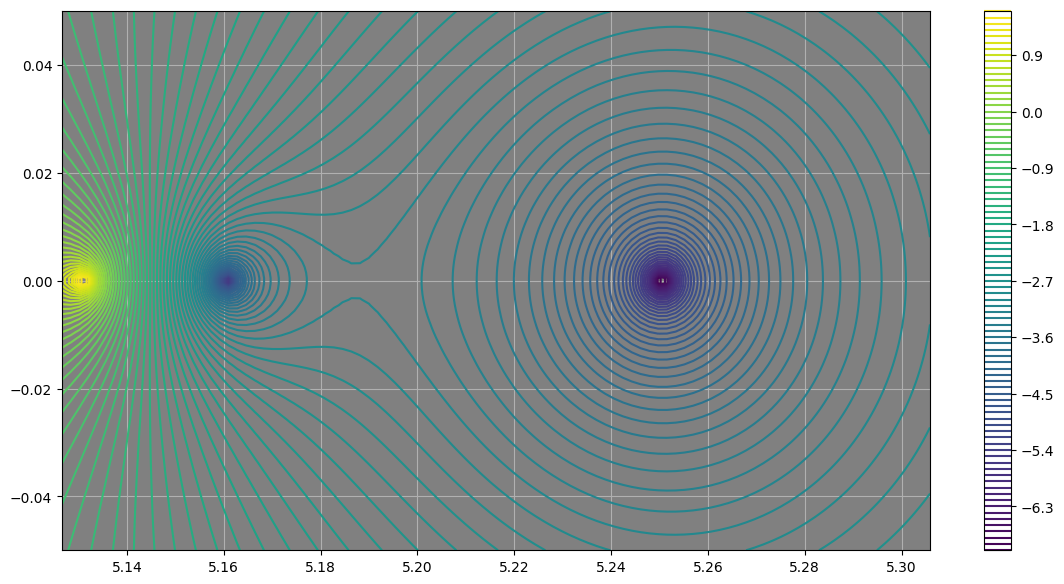

In [178]:
plotlogf(A.determinant, .99909*A.K_low, 1.00001*A.K_high, -.05, .05, field_type, mode_type,
         iref=100, rref=100,levels=100)

In [182]:
beta_g1 = newton(A.determinant, 5.25, args=(field_type, mode_type))
beta_g2 = newton(A.determinant, 5.16, args=(field_type, mode_type))

beta_g1, beta_g2

((5.25050833512532-5.259884678595418e-19j),
 (5.160560035193107-5.462316258784779e-19j))

In [183]:
Fg1 = A.fields(beta_g1, field_type=field_type, mode_type=mode_type, c0=1)
Fg2 = A.fields(beta_g2, field_type=field_type, mode_type=mode_type, c0=-1)


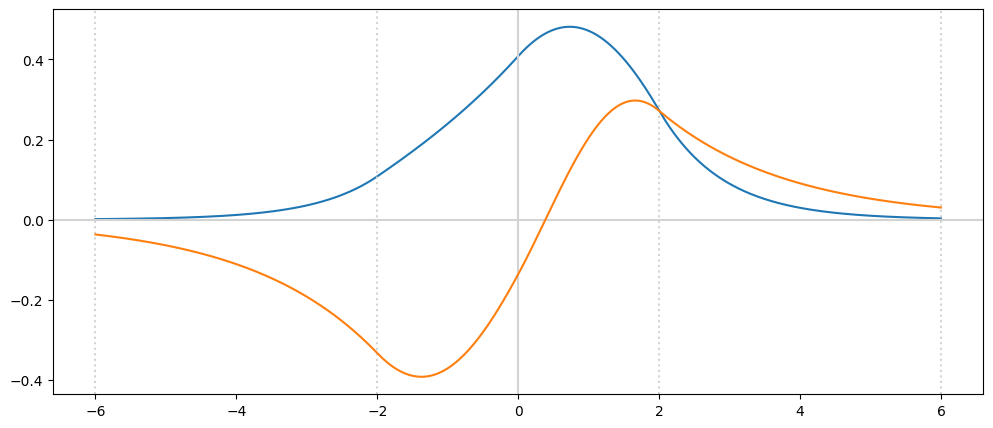

In [184]:
A.plot_field_1d(Fg1)
A.add_1d_plot(plt.gca(), Fg2)



# Leaky Modes

In [185]:
field_type = 'TE'
mode_type = 'leaky'

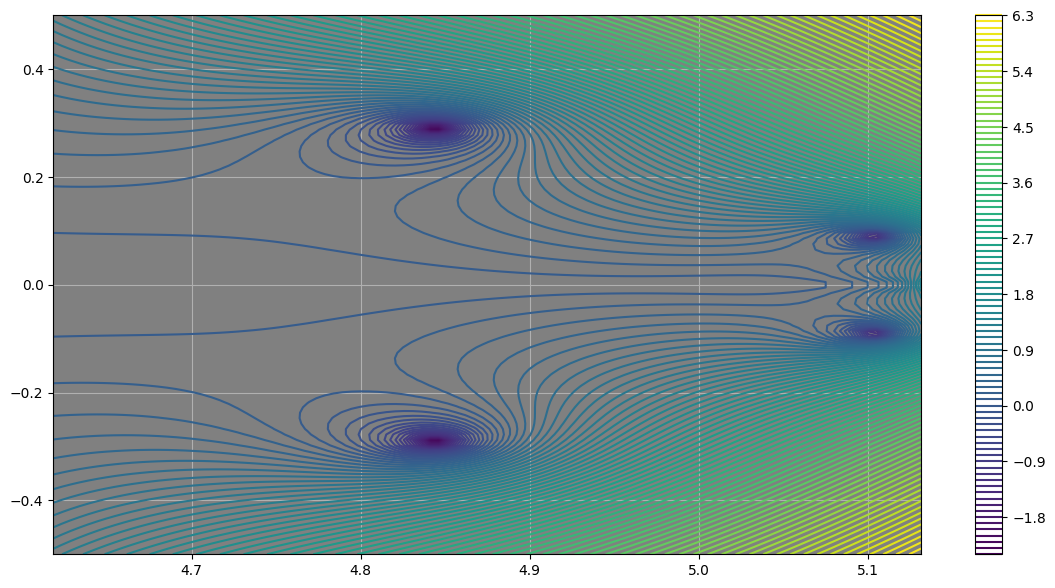

In [186]:
plotlogf(A.determinant, .9* A.K_low, 1.0001*A.K_low, -.5, .5, field_type, mode_type,
         iref=100, rref=100,levels=100)

In [164]:
beta_l1 = newton(A.determinant, np.array([5.1+.01j]), args=(field_type, mode_type))[0]
beta_l2 = newton(A.determinant, np.array([4.9+.4j]), args=(field_type, mode_type))[0]
# beta4 = newton(A.determinant, 10.42, args=(field_type, mode_type)).conj()
# beta5 = newton(A.determinant, 10.2, args=(field_type, mode_type)).conj()

beta_l1, beta_l2

((4.83691389745036+0.09487141116120594j),
 (4.844131410699045+0.29117701922118483j))

In [165]:
Fl1 = A.fields(beta_l1, field_type=field_type, mode_type=mode_type, c0=1)
Fl2 = A.fields(beta_l2, field_type=field_type, mode_type=mode_type, c0=-1)
# Fs3 = A.fields(beta3, field_type=field_type, mode_type=mode_type, c0=-1)
# Fs4 = A.fields(beta4, field_type=field_type, mode_type=mode_type, c0=-1)
# # Fs5 = A.fields(beta5, field_type=field_type, mode_type=mode_type, c0=-1)

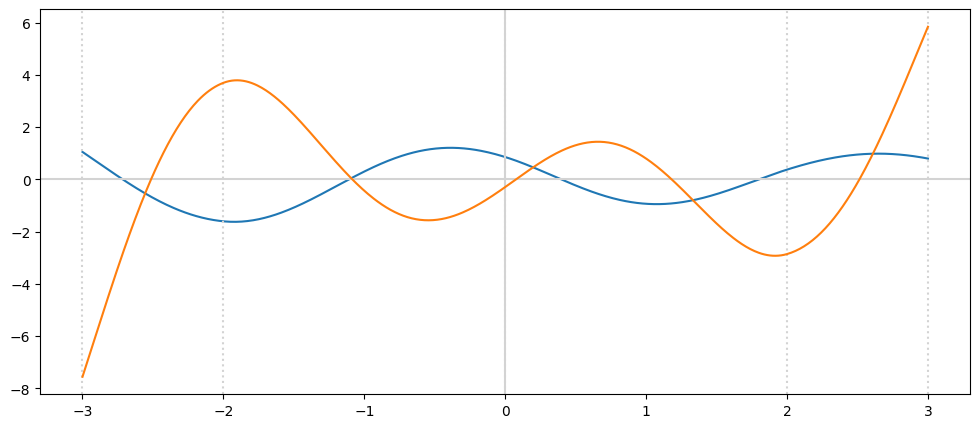

In [166]:
A.plot_field_1d(Fl1)
A.add_1d_plot(plt.gca(), Fl2)
# A.add_1d_plot(plt.gca(), Fs3)
# A.add_1d_plot(plt.gca(), Fs4)
# A.add_1d_plot(plt.gca(), Fs5)


## Radiation Modes

In [167]:
 A.Z_hyperbolic, A.Z_evanescent.real

(0.0, 5.1312680008633285)

In [187]:
Fr1 = A.fields(.001*A.Z_evanescent.real, field_type=field_type, mode_type=mode_type, sign='1', Z_plane=True)


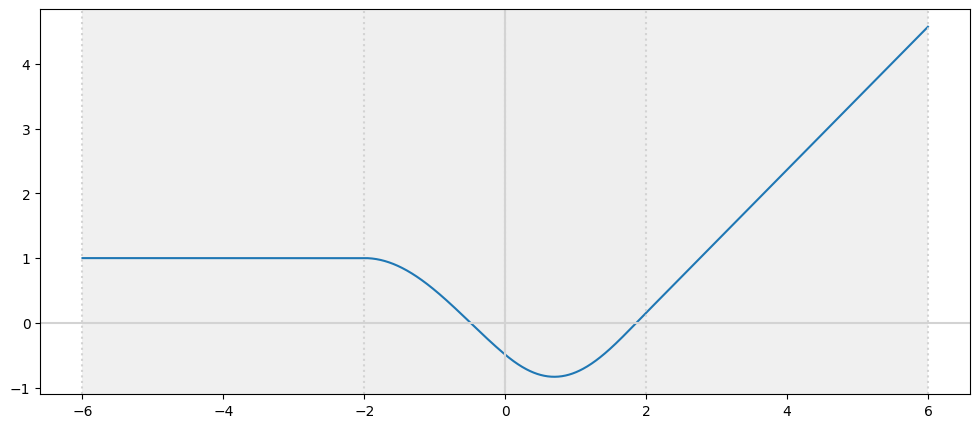

In [188]:
A.plot_field_1d(Fr1, plot_axis=True, part='real', plot_regions=True, plot_Rhos=True, hatch=None)